In [25]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector, plot_histogram

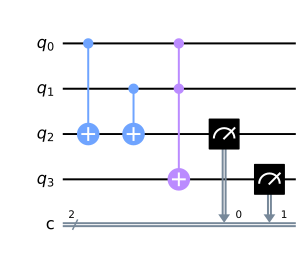

In [51]:
"""半加算器回路の作成
q0, q1 := 足す値
q2, q3 := 結果（q2:sum値, q3:carry値）

q0 + q1 = q3q2

c0, c1 := q2, q3の測定結果を保持するcbit
"""
qc_halfadd = QuantumCircuit(4, 2, name="halfadd")  # qubit:4, cbit:2
qc_halfadd.cx(0, 2)
qc_halfadd.cx(1, 2)
qc_halfadd.ccx(0, 1, 3)
qc_halfadd.measure([2,3], [0,1])

qc_halfadd.draw()

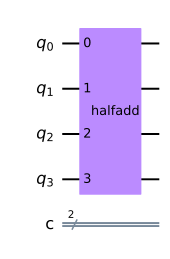

In [52]:
"""0 + 0の計算"""
qc00 = QuantumCircuit(4, 2)

qc00.append(qc_halfadd, [0,1,2,3], [0,1])

qc00.draw()

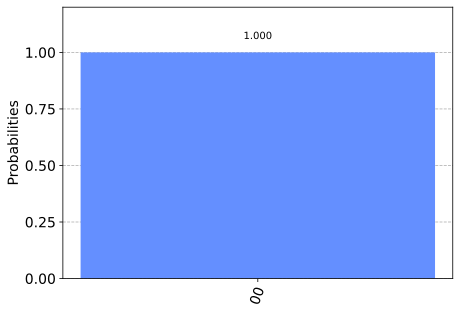

In [53]:
# 測定結果
results = execute(qc00, backend=BasicAer.get_backend('qasm_simulator'), shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

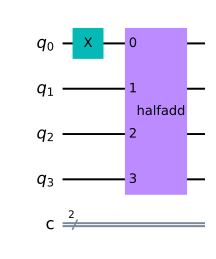

In [54]:
"""0+1の半加算器計算"""
qc01 = QuantumCircuit(4, 2)
qc01.x(0)
qc01.append(qc_halfadd, [0,1,2,3], [0,1])
qc01.draw()

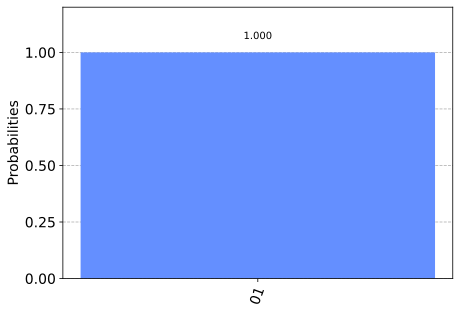

In [55]:
# 測定結果
results = execute(qc01, backend=BasicAer.get_backend("qasm_simulator"), shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

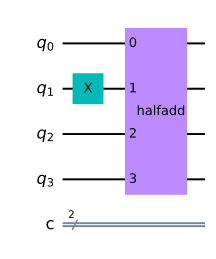

In [56]:
"""1+0の半加算器計算"""
qc10 = QuantumCircuit(4, 2)
qc10.x(1)
qc10.append(qc_halfadd, [0,1,2,3], [0,1])
qc10.draw()

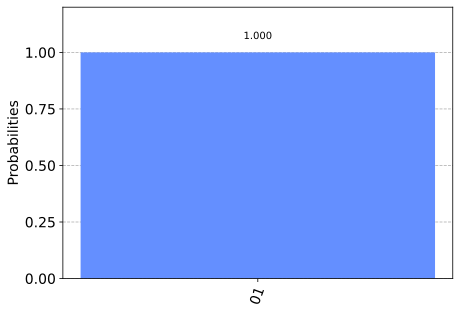

In [57]:
# 測定結果
results = execute(qc10, backend=BasicAer.get_backend("qasm_simulator"), shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

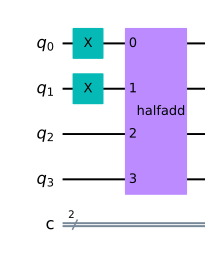

In [58]:
"""1+1の半加算器計算"""
qc11 = QuantumCircuit(4, 2)
qc11.x(0)
qc11.x(1)
qc11.append(qc_halfadd, [0,1,2,3], [0,1])
qc11.draw()

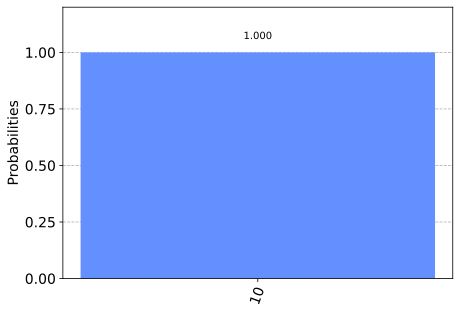

In [59]:
# 測定結果
results = execute(qc11, backend=BasicAer.get_backend("qasm_simulator"), shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)